In [42]:
import pandas as pd

In [43]:
cars = {
    "mercedees":{"model":2017, "color":"black"},
    "volvo":{"model":2019, "color":"red"},
    "mercedees":{"model":2002, "color":"cream"},
}

df = pd.DataFrame(cars)
print(df)

      mercedees volvo
model      2002  2019
color     cream   red


In [44]:
students = ["Tom", "Trevor", "Mark", "John"]
std_serie = pd.Series(students)
std_serie

0       Tom
1    Trevor
2      Mark
3      John
dtype: object

In [45]:
days_dates = {
    "Mon": "2023-07-03",
    "Tue": "2023-07-04",
    "Wed": "2023-07-05",
    "Thur": "2023-07-06",
    "Fri": "2023-07-07"
}

dte_series = pd.Series(days_dates)
print(dte_series)

Mon     2023-07-03
Tue     2023-07-04
Wed     2023-07-05
Thur    2023-07-06
Fri     2023-07-07
dtype: object


ANALYZING DATA EXERCISE

NUMBER ONE(WORK.CSV)

In [46]:
work_df = pd.read_csv("Work.csv")
work_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      7 non-null      object
 1   city      7 non-null      object
 2   age       6 non-null      object
 3   py-score  6 non-null      object
dtypes: object(4)
memory usage: 352.0+ bytes


In [47]:
work_df.describe(include = 'object').T

,count,unique,top,freq
Name,7,7,Emma,1
city,7,7,Kampala,1
age,6,6,23,1
py-score,6,6,90,1


In [48]:
print(work_df.head())

     Name         city  age py-score
0    Emma      Kampala   23       90
1  Wilber        Mbale   26       75
2   Robin         Gulu   25     mine
3   Tevor  Livingstone  NaN       89
4    Yeko       Tororo   20       94


In [49]:
print(work_df.tail())

     Name         city    age py-score
2   Robin         Gulu     25     mine
3   Tevor  Livingstone    NaN       89
4    Yeko       Tororo     20       94
5  Miriam         Arua  Train      NaN
6   Jesca      Mbarara     21       84


In [50]:
print(work_df)

     Name         city    age py-score
0    Emma      Kampala     23       90
1  Wilber        Mbale     26       75
2   Robin         Gulu     25     mine
3   Tevor  Livingstone    NaN       89
4    Yeko       Tororo     20       94
5  Miriam         Arua  Train      NaN
6   Jesca      Mbarara     21       84


In [51]:
work_df.columns

Index(['Name', 'city', 'age', 'py-score'], dtype='object')

In [52]:
work_df.isnull().sum().sort_values(ascending = False)

age         1
py-score    1
Name        0
city        0
dtype: int64

In [53]:
work_df.duplicated().sum()

0

<Axes: >

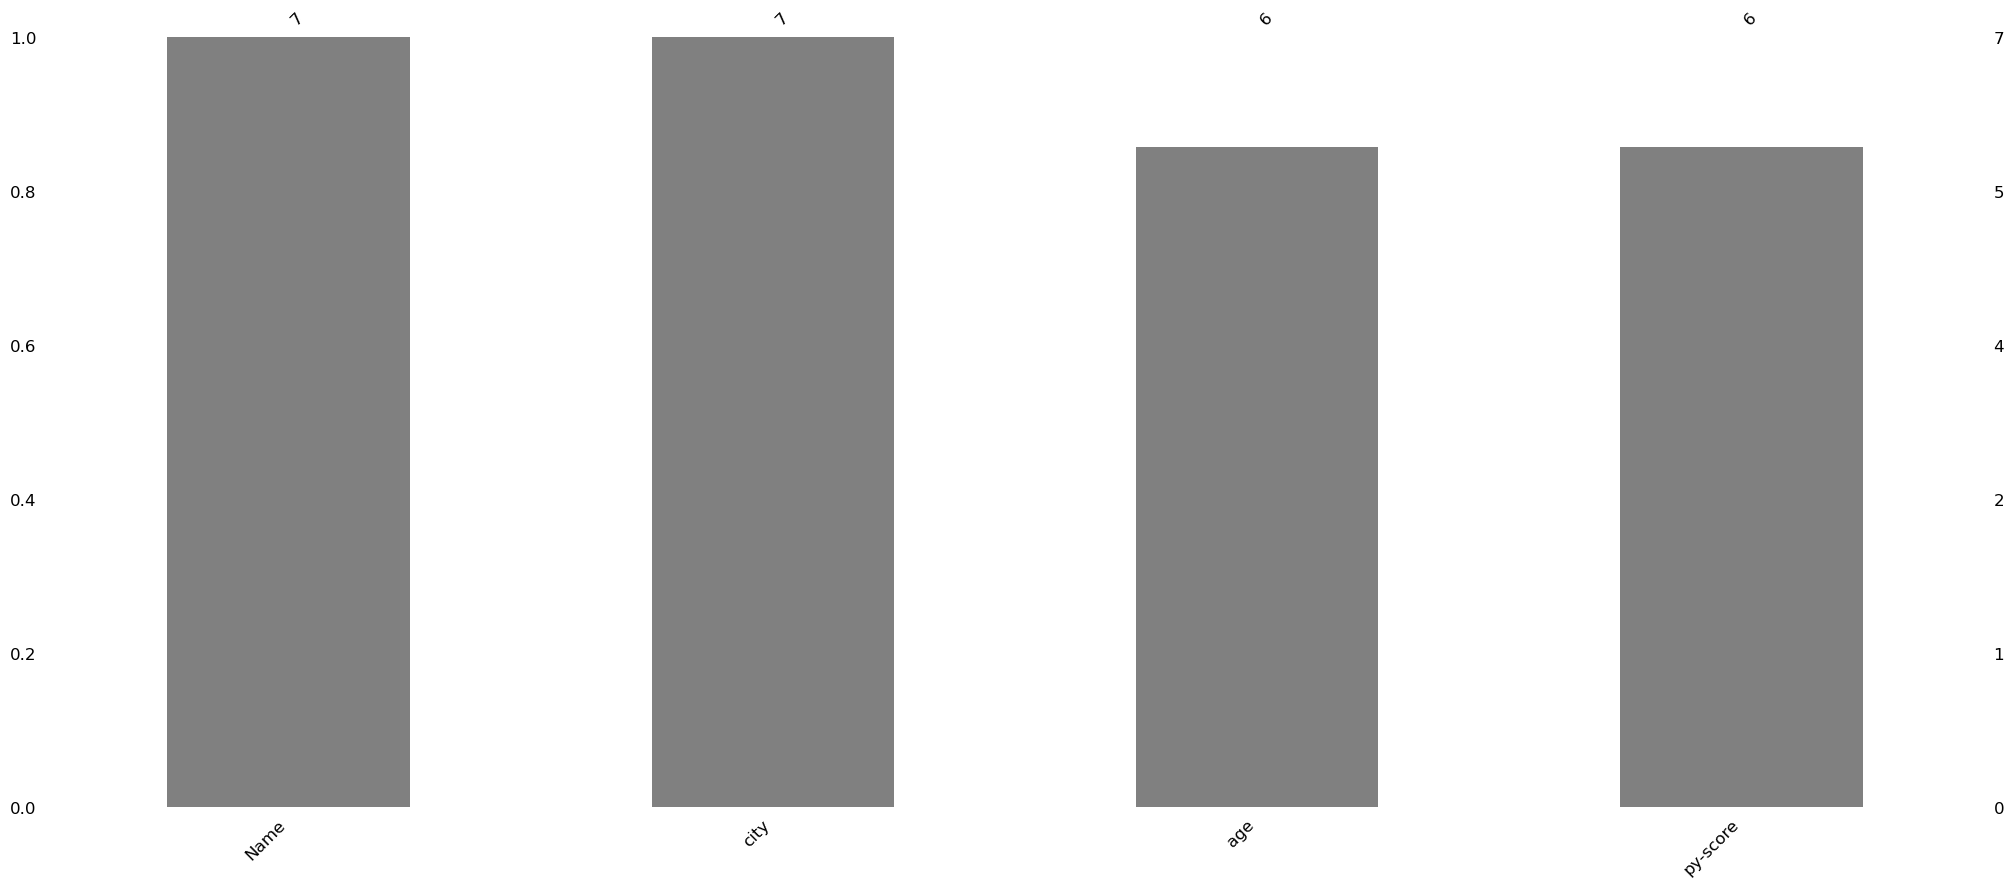

In [54]:
import missingno as msno
msno.bar(work_df, color = "grey", fontsize= 12)

In [55]:
for i in work_df.columns:
    if work_df[i].isnull().any():
        print(i, "------", work_df[i].isnull().sum()*100/work_df.shape[0], "%")

age ------ 14.285714285714286 %
py-score ------ 14.285714285714286 %


In [61]:
work_df['age'] = pd.to_numeric(work_df['age'], errors='coerce')
work_df['age'] = work_df['age'].astype('Int64')
work_df['py-score'] = pd.to_numeric(work_df['py-score'], errors='coerce')
work_df['py-score'] = work_df['py-score'].astype('Int64')
mean_age = work_df['age'].mean(skipna=True)
mean_py_score = work_df['py-score'].mean(skipna=True)

print("Mean Age:", mean_age)
print("Mean Py-Score:", mean_py_score)



Mean Age: 23.0
Mean Py-Score: 86.4


In [62]:
print(work_df)

     Name         city   age  py-score
0    Emma      Kampala    23        90
1  Wilber        Mbale    26        75
2   Robin         Gulu    25      <NA>
3   Tevor  Livingstone  <NA>        89
4    Yeko       Tororo    20        94
5  Miriam         Arua  <NA>      <NA>
6   Jesca      Mbarara    21        84


In [69]:
# Drop the row with 'Livingstone' as the city
work_df = work_df[work_df['city'] != 'Livingstone']

# Reset the index of the DataFrame
work_df.reset_index(drop=True, inplace=True)
print(work_df)

     Name     city   age  py-score
0    Emma  Kampala    23        90
1  Wilber    Mbale    26        75
2   Robin     Gulu    25      <NA>
3    Yeko   Tororo    20        94
4  Miriam     Arua  <NA>      <NA>
5   Jesca  Mbarara    21        84


In [72]:
# Replace null values in the 'age' column with a mean value
work_df['age'].fillna(value=23, inplace=True)

# Replace null values in the 'age' column with a mean value
work_df['py-score'].fillna(value=86, inplace=True)

print(work_df)

     Name     city  age  py-score
0    Emma  Kampala   23        90
1  Wilber    Mbale   26        75
2   Robin     Gulu   25        86
3    Yeko   Tororo   20        94
4  Miriam     Arua   23        86
5   Jesca  Mbarara   21        84


In [76]:
# Perform correlation
correlation = work_df[['age', 'py-score']].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation)

Correlation Matrix:
               age  py-score
age       1.000000 -0.726255
py-score -0.726255  1.000000


NUMBER TWO(MINE.CSV)

In [93]:
mine_df = pd.read_csv('mine.csv')
print(mine_df.head())


   Duration  Pulse  Maxpulse  Calories
0        60    110       130     409.1
1        60    117       145     479.0
2        60    103       135     340.0
3        45    109       175     282.4
4        45    117       148     406.0


In [78]:
print(mine_df.tail())

     Duration  Pulse  Maxpulse  Calories
164        60    105       140     290.8
165        60    110       145     300.0
166        60    115       145     310.2
167        75    120       150     320.4
168        75    125       150     330.4


In [79]:
mine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null    int64  
 2   Maxpulse  169 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.4 KB


In [92]:
print(mine_df.duplicated().sum())

7


In [95]:
mine_df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [97]:
mine_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,169.0,63.846154,42.299949,15.0,45.000,60.0,60.0,300.0
Pulse,169.0,107.461538,14.510259,80.0,100.000,105.0,111.0,159.0
Maxpulse,169.0,134.047337,16.450434,100.0,124.000,131.0,141.0,184.0
Calories,164.0,375.790244,266.379919,50.3,250.925,318.6,387.6,1860.4


In [99]:
mine_df.isnull().sum().sort_values(ascending = False)

Calories    5
Duration    0
Pulse       0
Maxpulse    0
dtype: int64

In [100]:
for i in mine_df.columns:
    if mine_df[i].isnull().any():
        print(i, "------", mine_df[i].isnull().sum()*100/mine_df.shape[0], "%")

Calories ------ 2.9585798816568047 %


In [101]:
#Removing Duplicates
mine_df.drop_duplicates(inplace = True)

In [102]:
#Reomoving rows with Null values
mine_df.dropna(inplace = True)

In [ ]:
print(mine_df.to_string())

In [104]:
mine_df.corr()

,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,-0.167770,-0.000501,0.923053
Pulse,-0.167770,1.000000,0.784994,0.015301
Maxpulse,-0.000501,0.784994,1.000000,0.195309
Calories,0.923053,0.015301,0.195309,1.000000
